# Exercise 2.12 parts (a) and (c)

In [3]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

   n    &    h     &      E_h     &   Rate of Conv. \\ \hline
   5    &   0.167  & 0.00057870   &            \\
  10    &   0.091  & 0.00017075   &   2.0137   \\
  20    &   0.048  & 0.00004713   &   1.9907   \\
  40    &   0.024  & 0.00001239   &   1.9975   \\
  80    &   0.012  & 0.00000317   &   1.9993   \\


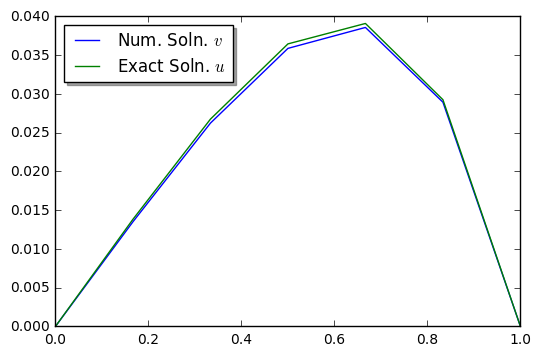

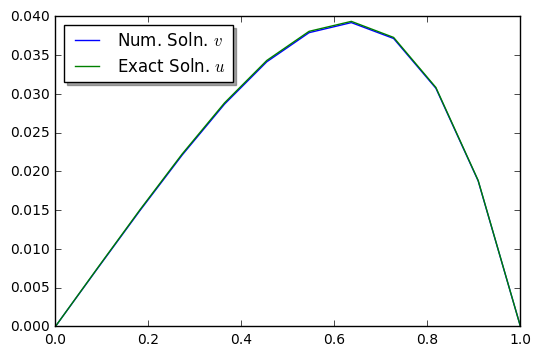

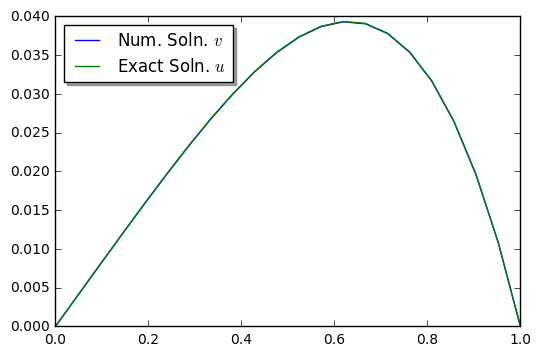

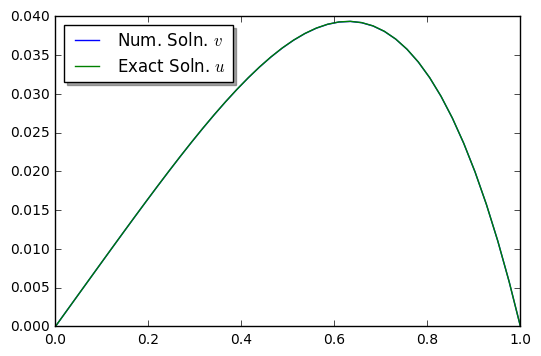

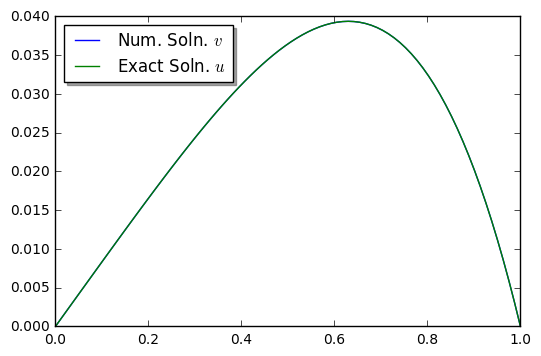

In [7]:
# Part (a)

def f(x):
    z = x**2
    return z

def u_exact(x):
    z = x/12-x**4/12
    return z

n = [5, 10, 20, 40, 80]
E_h = np.zeros(5)
h = np.zeros(5)
alpha_h = np.zeros(5)

count = 0
print '   n    &    h     &      E_h     &   Rate of Conv. ' + r'\\ \hline'
for n in n:
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)
    
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    b = h[count]**2 * f(x) # <----- This line changes

    v = np.zeros(n+2)
    v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

    u = u_exact(x) #Exact soln. <---- This line changes
    
    E_h[count] = np.max(np.abs(u-v))
    
    if count == 0:
        print ' %3d    &   %.3f  & %.8f   &         ' % (n, h[count], E_h[count]) + r'   \\'
    else:
        alpha_h[count] = np.log(E_h[count]/E_h[count-1])/np.log(h[count]/h[count-1])
        print ' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], alpha_h[count]) + r'  \\'
    
    plt.figure(count)
    plt.plot(x,v,label='Num. Soln. $v$')
    plt.plot(x,u,label='Exact Soln. $u$')
    plt.legend(loc='upper left', shadow=True)
    
    count +=1

   n    &    h     &      E_h     &   Rate of Conv. \\ \hline
   5    &   0.167  & 0.05352913   &            \\
  10    &   0.091  & 0.00214685   &   5.3061   \\
  20    &   0.048  & 0.00042192   &   2.5160   \\
  40    &   0.024  & 0.00010198   &   2.1225   \\
  80    &   0.012  & 0.00002559   &   2.0308   \\


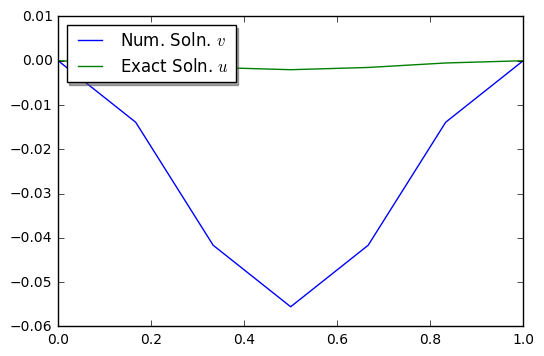

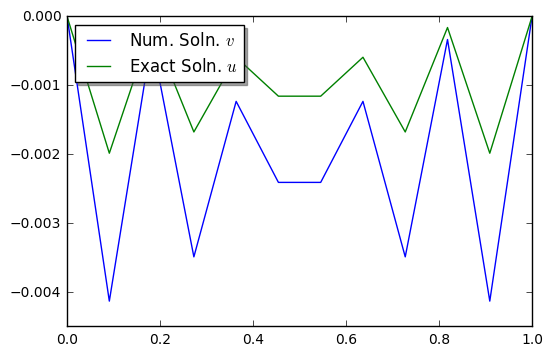

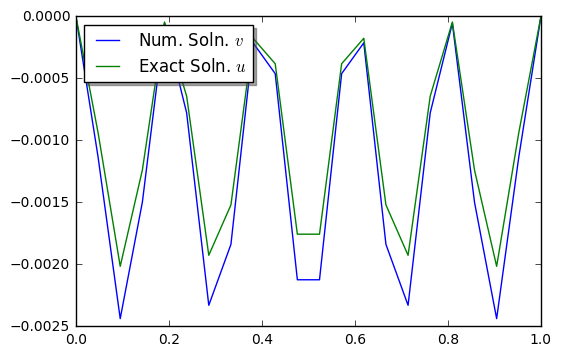

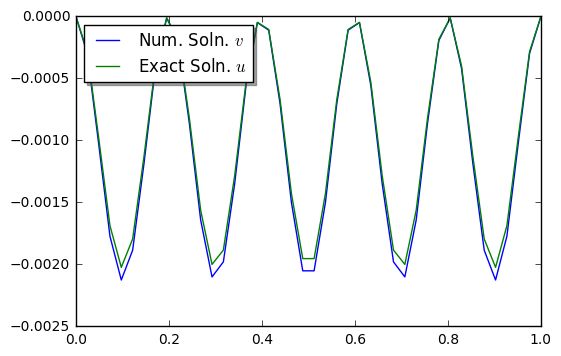

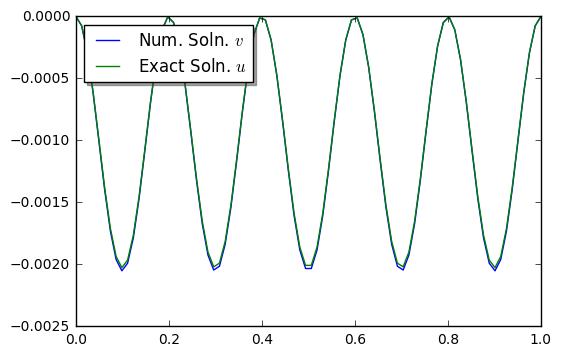

In [12]:
# Part (b)

def f(x,a):
    z = np.cos(a*x)
    return z

def u_exact(x,a):
    z = x/a**2 * (1-np.cos(a)) + 1/a**2 * (np.cos(a*x)-1)
    return z

a = 10*np.pi # <----- Try a = pi, 10pi, 20pi, etc. 

n = [5, 10, 20, 40, 80]
E_h = np.zeros(5)
h = np.zeros(5)
alpha_h = np.zeros(5)

count = 0
print '   n    &    h     &      E_h     &   Rate of Conv. ' + r'\\ \hline'
for n in n:
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)
    
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    b = h[count]**2 * f(x,a) # <----- This line changes

    v = np.zeros(n+2)
    v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

    u = u_exact(x,a) #Exact soln. <---- This line changes
    
    E_h[count] = np.max(np.abs(u-v))
    
    if count == 0:
        print ' %3d    &   %.3f  & %.8f   &         ' % (n, h[count], E_h[count]) + r'   \\'
    else:
        alpha_h[count] = np.log(E_h[count]/E_h[count-1])/np.log(h[count]/h[count-1])
        print ' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], alpha_h[count]) + r'  \\'
    
    plt.figure(count)
    plt.plot(x,v,label='Num. Soln. $v$')
    plt.plot(x,u,label='Exact Soln. $u$')
    plt.legend(loc='upper left', shadow=True)
    
    count +=1